<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Quick-look-at-the-data-structure" data-toc-modified-id="Quick-look-at-the-data-structure-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Quick look at the data structure</a></span></li><li><span><a href="#Create-a-test-set-using-stratified-sampling" data-toc-modified-id="Create-a-test-set-using-stratified-sampling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create a test set using stratified sampling</a></span></li><li><span><a href="#Visualizing-the-data" data-toc-modified-id="Visualizing-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualizing the data</a></span></li><li><span><a href="#Correlation-plot" data-toc-modified-id="Correlation-plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlation plot</a></span></li><li><span><a href="#feature-engineering" data-toc-modified-id="feature-engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>feature engineering</a></span></li></ul></div>

# Download the data

In [83]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
% matplotlib inline

In [53]:
DOWNLOAD_URL = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'
LOCAL_FOLDER_PATH = os.path.join("datasets","housing")

In [54]:
def fetch_data(download_url = DOWNLOAD_URL, local_folder_path = LOCAL_FOLDER_PATH, cfilename = 'datafile.tgz'):
    if not os.path.isdir(local_folder_path):
        print(local_folder_path)
        os.mkdir(local_folder_path)
    local_filename = os.path.join(local_folder_path, cfilename)
    urllib.request.urlretrieve(download_url, filename=local_filename)
    local_tgz = tarfile.open(local_filename)
    local_tgz.extractall(path=local_folder_path)
    local_tgz.close()    

In [55]:
#fetch_data(cfilename='housing.tgz')

In [56]:
df_housing = pd.read_csv('../datasets/housing/housing.csv')

## Quick look at the data structure

In [57]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [58]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [59]:
df_housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [60]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


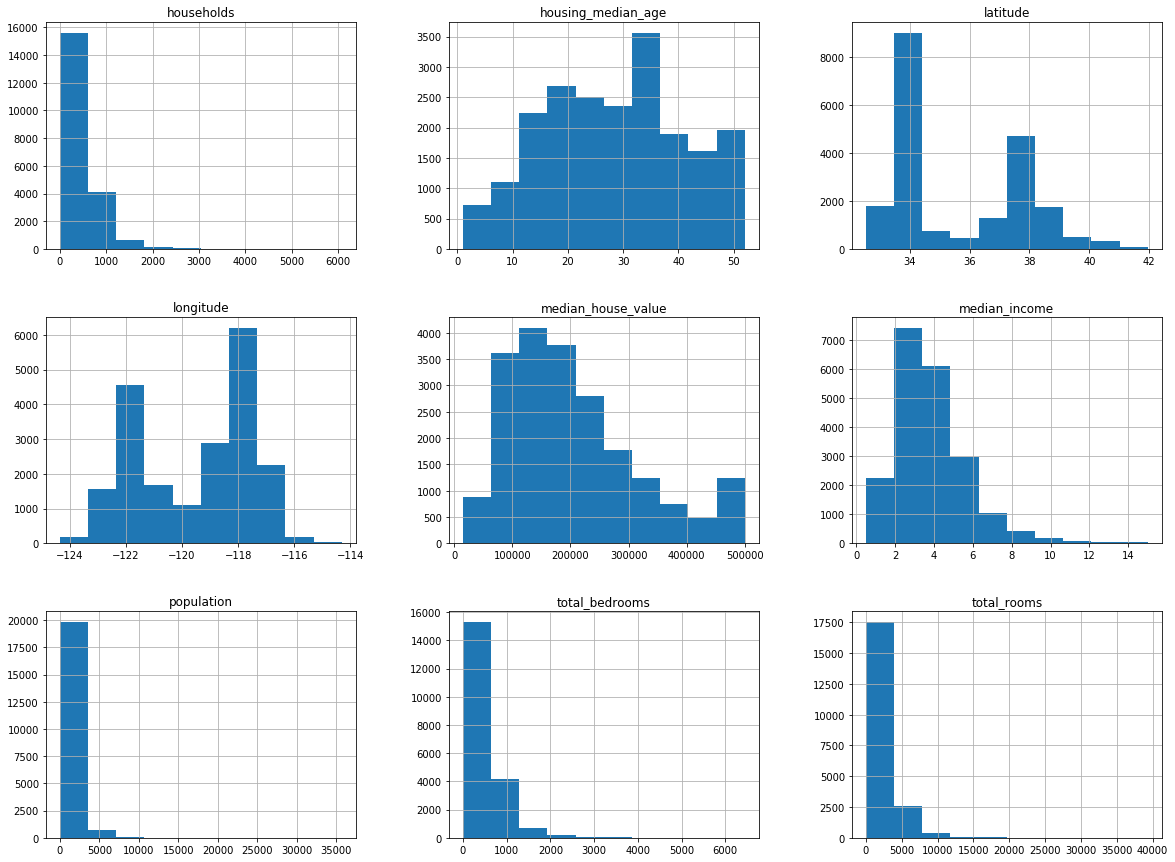

In [61]:
df_housing.hist(figsize=(20,15))
plt.show()

## Create a test set using stratified sampling

In [62]:
df_housing["income_cat"] = np.ceil(df_housing["median_income"]/1.5)
df_housing["income_cat"].where(df_housing["income_cat"] < 5.0, 5.0, inplace=True)

In [63]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(df_housing, df_housing["income_cat"]):
    strat_train_set = df_housing.loc[train_index]
    strat_test_set = df_housing.loc[test_index]

In [64]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

## Visualizing the data

In [84]:
housing_train = strat_train_set.copy()

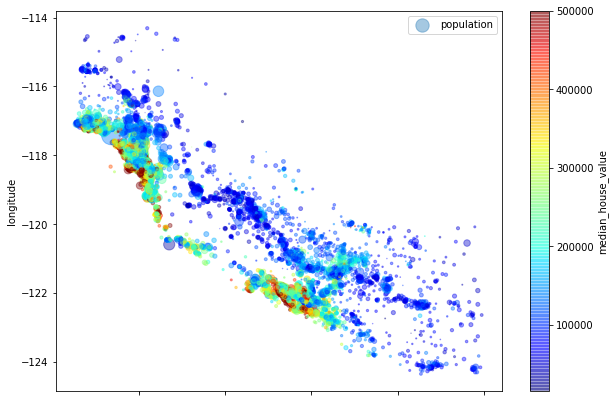

In [85]:
housing_train.plot(kind = "scatter", y="longitude", x = "latitude", alpha =0.4,
                 s=housing_test["population"]/100, label ="population", figsize=(10, 7),
                 c= "median_house_value",cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

## Correlation plot

In [86]:
corr_matrix = housing_train.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


[]

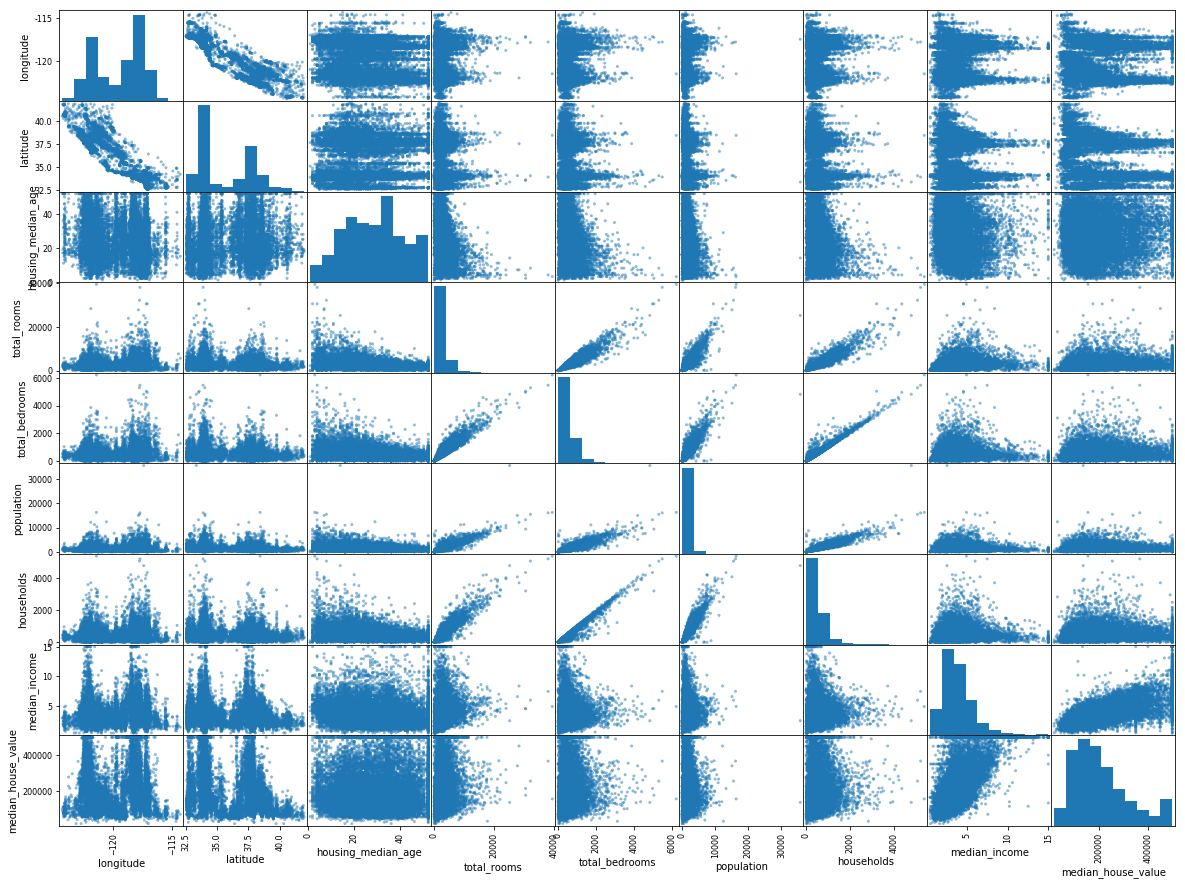

In [90]:
scatter_matrix(housing_train, figsize=(20,15))
plt.plot()

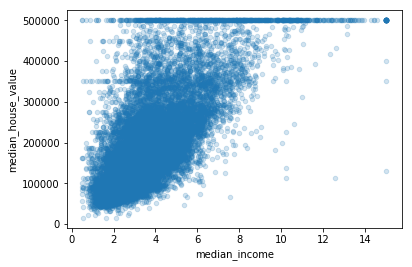

In [95]:
housing_train.plot(kind = "scatter", x='median_income', y="median_house_value", alpha=0.2)

## feature engineering

In [100]:
housing_train["rooms_per_household"] = housing_train["total_rooms"]/housing_train["households"]
housing_train["bedroom_per_room"] = housing_train["total_bedrooms"]/housing_train["total_rooms"]
housing_train["population_per_household"] = housing_train["population"]/housing_train["households"]

In [101]:
housing_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedroom_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314
